# Evaluation of Segmented Linear Regression

---

### Import Libraries

In [8]:
import sys
import os
root = os.path.abspath('..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from piecewise_regression import r_squared_calc


from modules import load, plots, analysis, utils

# styles
plt.style.use('seaborn-v0_8-white')

---

### Load data

In [9]:
# Inputs
name = 'AW1D_YSI_20230826'

In [10]:
path_json = f'../data/results/{name}_results.json'

df = load.load_data(filepath=path_json, json=True)
df


,trial_1,trial_2,trial_3,trial_4,trial_5
df,"{'bic': {'0': 87202.4715959557, '1': 71561.988...","{'bic': {'0': 87202.4715959557, '1': 71561.988...","{'bic': {'0': 87202.4715959557, '1': 71561.988...","{'bic': {'0': 87202.4715959557, '1': 71561.988...","{'bic': {'0': 87202.4715959557, '1': 71561.988..."
best_n_breakpoint_bic,5,2,3,3,3
min_bic_n_breakpoint,7,8,10,7,9
best_n_breakpoint_rss,1,1,1,1,1


In [11]:
path_processed = f'../data/processed/{name}_processed.csv'

x_processed, y_processed = load.load_data(filepath=path_processed, 
                            x_col='Vertical Position [m]',
                            y_col='Corrected sp Cond [uS/cm]'
                            )

---

### Optimal `n_breakpoint`

In [12]:
trial = analysis.select_best_trial(path_json)

trial_select = df[trial[0]]
#N_BREAKPOINT = df.loc['best_n_breakpoint_bic'].mode().iloc[0] # alternative, select 'best_n_breakpoint_rss'
N_BREAKPOINT = 6

In [13]:
# Elbow plot

x_values = np.array(list(trial_select['df']['n_breakpoints'].values()))
y_values = np.array(list(trial_select['df']['bic'].values()))
secondary_x = np.array(list(trial_select['df']['n_breakpoints'].values()))
secondary_y = np.array(list(trial_select['df']['rss'].values()))

plots.plot_data(
    x_values=x_values,
    y_values=y_values,
    plot_mode='lines+markers',
    x_axis_label="Number Breakpoints",
    y_axis_label="BIC",
    secondary_x=secondary_x,
    secondary_y=secondary_y,
    use_secondary_axis=True,
    y2_axis_label="RSS",
    trace_names=['BIC', 'RSS']
)

---

### Evaluation

In [14]:
# Params
params_ms = utils.get_breakpoint_data(trial_select['df'], N_BREAKPOINT)
params_ms

{'bic': 54034.3143163429,
 'n_breakpoints': 6,
 'estimates': {'const': {'estimate': 1483.9277154158,
   'se': 14.3153051012,
   'confidence_interval': [1455.8631177296, 1511.9923131019],
   't_stat': 103.6602227425,
   'p_t': 0.0},
  'beta1': {'estimate': 88.1506804535,
   'se': 7.6410075989,
   'confidence_interval': [73.1707828779, 103.1305780292],
   't_stat': 11.5365256889,
   'p_t': '-'},
  'breakpoint1': {'estimate': 11.8588799603,
   'se': 0.2365064356,
   'confidence_interval': [11.3952183115, 12.3225416091],
   't_stat': '-',
   'p_t': '-'},
  'beta2': {'estimate': 2146.3590423155,
   'se': 69.7980892317,
   'confidence_interval': [2009.5226088829, 2283.1954757481],
   't_stat': 30.750971351,
   'p_t': '-'},
  'breakpoint2': {'estimate': 16.317072767,
   'se': 0.0207614302,
   'confidence_interval': [16.2763707924, 16.3577747416],
   't_stat': '-',
   'p_t': '-'},
  'beta3': {'estimate': 12952.0014040592,
   'se': 86.7414293494,
   'confidence_interval': [12781.948212723, 1312

In [15]:
# Model Select
ms = utils.rebuild_model(x_processed,y_processed,params_ms)
ms

In [16]:
# Globals
RSS, TSS, R2, R2_ajus = r_squared_calc.get_r_squared(y_processed, 
                                                    ms.predict(x_processed), 
                                                    len(ms.get_params()))


print("RSS: ", RSS)
print("TSS: ", TSS)
print("R2: ", R2)
print("R2_ajus: ", R2_ajus)

RSS:  372018036.44469875
TSS:  1124330601234.085
R2:  0.9996691204205984
R2_ajus:  0.9996676624954689


In [17]:
# Per segment
metric_per_segment = analysis.calculate_metrics_per_segment(ms)
metric_per_segment

[{'Segment': 1,
  'R^2': np.float64(0.11159084725953583),
  'RMS%': np.float64(2.5250450013475265),
  'RMS% (min-max)': np.float64(13.458943506866797)},
 {'Segment': 2,
  'R^2': np.float64(0.9258639575941673),
  'RMS%': np.float64(1.7552381875017464),
  'RMS% (min-max)': np.float64(7.088008256616464)},
 {'Segment': 3,
  'R^2': np.float64(0.9565612743443993),
  'RMS%': np.float64(4.853903338770019),
  'RMS% (min-max)': np.float64(6.184024410874452)},
 {'Segment': 4,
  'R^2': np.float64(0.97447166354636),
  'RMS%': np.float64(9.082800676809494),
  'RMS% (min-max)': np.float64(5.146481833231531)},
 {'Segment': 5,
  'R^2': np.float64(0.8910081322903047),
  'RMS%': np.float64(0.7586434887677282),
  'RMS% (min-max)': np.float64(9.209978224040507)},
 {'Segment': 6,
  'R^2': np.float64(0.978320871722829),
  'RMS%': np.float64(1.8724555520501425),
  'RMS% (min-max)': np.float64(4.213031986751836)},
 {'Segment': 7,
  'R^2': np.float64(0.9803652210260156),
  'RMS%': np.float64(0.7318726762894014)

In [18]:
# Breakpoints
breakpoints = analysis.extract_breakpoints(ms)
breakpoints

,Breakpoint X Position,Breakpoint Y Position,Confidence Interval (X)
0,11.858880,1531.968768,"(11.395218311512119, 12.322541609117573)"
1,16.317073,1943.021911,"(16.276370792356023, 16.357774741584922)"
2,17.361996,4282.147169,"(17.353783741824394, 17.370209228400526)"
3,18.596410,23033.575600,"(18.588059102079583, 18.60475999819719)"
4,19.658917,24793.911963,"(19.644644444553492, 19.673189808014698)"
5,21.314680,37495.552772,"(21.3013856640367, 21.327974963480308)"


##

---

### Final results

#### General models

In [19]:
# Visualizamos los datos procesados junto con los modelos obtenidos
df_ms = pd.DataFrame({'n_breakpoints': trial_select['df']['n_breakpoints'], 
                    'estimates': trial_select['df']['estimates']})

plots.interactive_segmented_regression(x=x_processed, y=y_processed, df=df_ms)

interactive(children=(IntSlider(value=0, description='n_breakpoints', max=10), Output()), _dom_classes=('widge…

#### Models per segment

In [20]:
segments = utils.extract_segments(ms)   
segments

{'segments': [{'segment': 1,
   'data_x': array([1.0000e-03, 4.0000e-03, 6.0000e-03, ..., 1.1844e+01, 1.1850e+01,
          1.1851e+01], shape=(2103,)),
   'data_y': array([1301.94912821, 1302.58676923, 1303.32057525, ..., 1553.71248309,
          1553.93416425, 1554.16123671], shape=(2103,)),
   'fitted_model': {'slope': np.float64(4.05106156204814),
    'intercept': np.float64(1483.9277154157514),
    'fitted_y': array([1483.93176648, 1483.94391966, 1483.95202179, ..., 1531.90848856,
           1531.93279493, 1531.93684599], shape=(2103,))}},
  {'segment': 2,
   'data_x': array([11.867, 11.875, 11.876, 11.882, 11.9  , 11.903, 11.905, 11.918,
          11.925, 11.929, 11.95 , 11.959, 11.962, 11.973, 11.98 , 11.986,
          11.993, 12.007, 12.009, 12.019, 12.025, 12.03 , 12.04 , 12.048,
          12.058, 12.062, 12.065, 12.072, 12.084, 12.089, 12.093, 12.109,
          12.111, 12.116, 12.131, 12.139, 12.14 , 12.152, 12.157, 12.158,
          12.169, 12.174, 12.177, 12.179, 12.191, 12

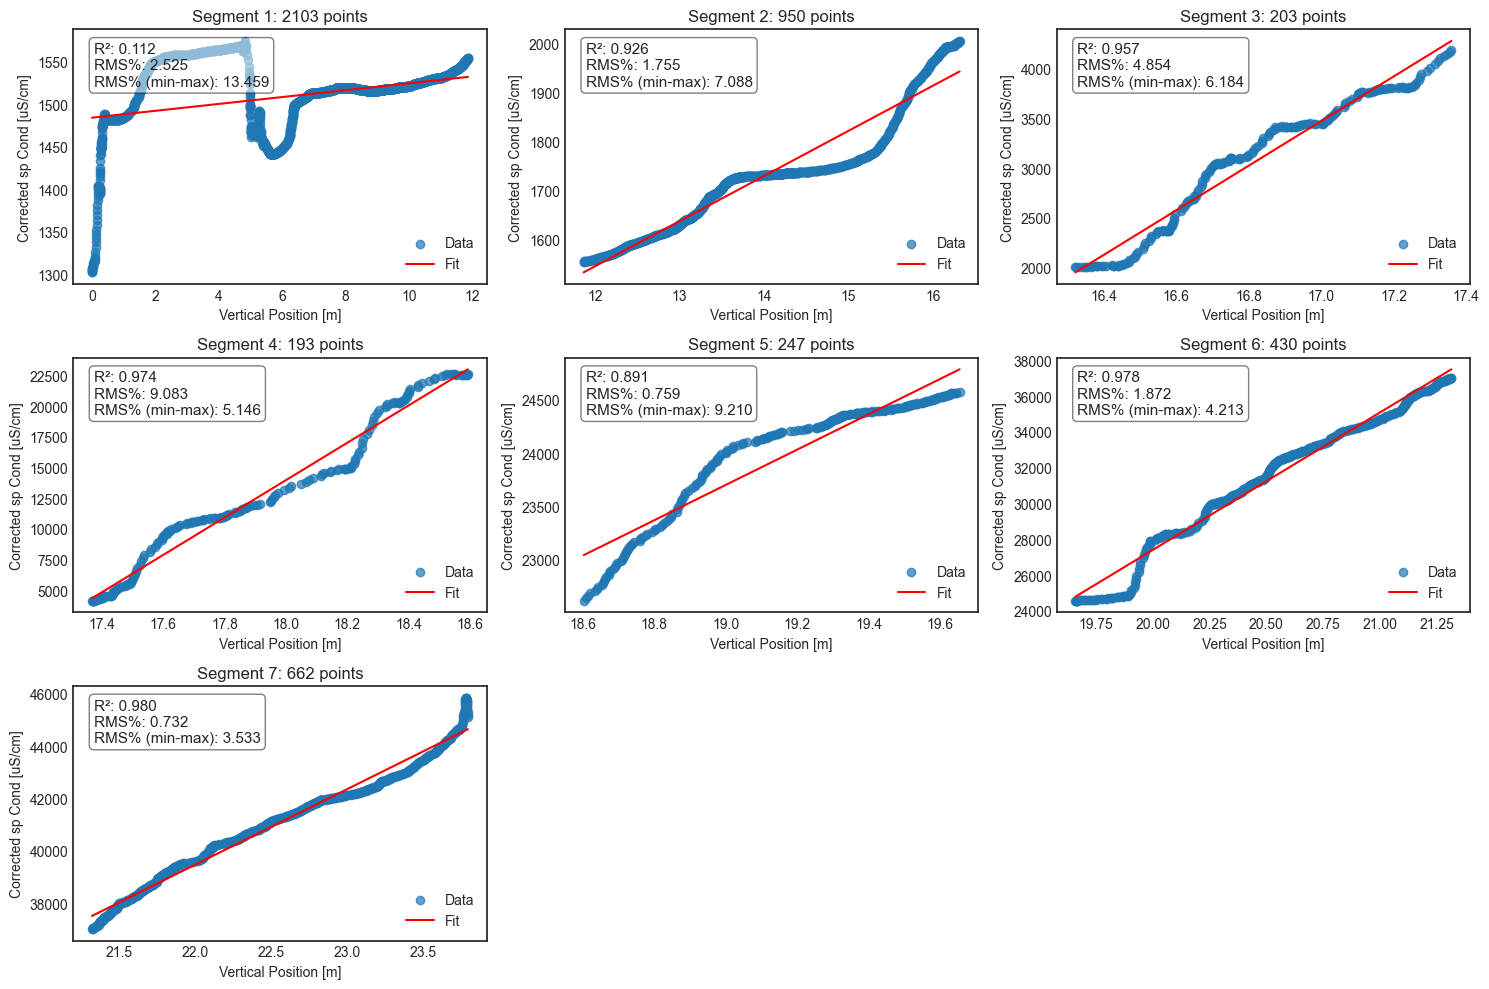

In [21]:
plots.plot_segments(segments, metric_per_segment)

---

## Other analysis

### 1. Density of points in processed data


In [22]:
width = 1 # meters

density = analysis.calculate_density(x_processed, y_processed, bin_width=width)

In [23]:
# Graficar densidad
plots.plot_histogram(density,
            value_column='x_bin', 
            weight_column='frequency', 
            num_bins=len(density['x_bin']),
            title=f'Densidad de datos a {width} metro(s)',
            x_axis_title='Vertical Position [m]',
            bar_color='lightgreen'
            ) 